In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [4]:
img_path = "/Users/makisbea/Labs/Computer-Generated-Hologram/Images/goose.jpg"
img = Image.open(img_path)
img = img.convert('L')
g = np.array(img)
g = g/255
np.max(g)

1.0

In [49]:
g.shape

(905, 1000)

In [52]:
def padding(g):
    M, N = g.shape
    m = max(M,N)
    a = int(np.log2(m)+1)
    A = 2**a
    t = np.zeros((A,A))
    print(round(A/2+M/2))
    t[int(A/2-M/2) : int(A/2+M/2), int(A/2-N/2) : int(A/2+N/2)] = g[:,:]
    return t

964


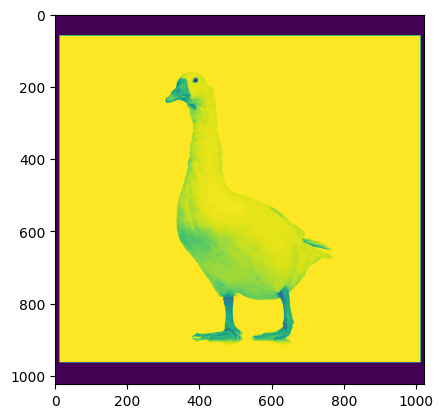

In [53]:
plt.imshow(padding(g))

In [ ]:
def fresnel(g, lambda_, d):
    M, N = g.shape
    